In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12


In [3]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../data/SnowData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,1/1/2000,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,1/2/2000,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,1/3/2000,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,1/4/2000,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,1/5/2000,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
...,...,...,...,...,...,...,...,...,...,...,...
814973,5/13/2021,Zirkel,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,Jackson
814974,5/14/2021,Zirkel,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,Jackson
814975,5/15/2021,Zirkel,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,Jackson
814976,5/16/2021,Zirkel,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,Jackson


In [4]:
df['Date'] = pd.to_datetime(df.Date)
df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,2000/01/01,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,2000/01/02,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,2000/01/03,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,2000/01/04,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,2000/01/05,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
...,...,...,...,...,...,...,...,...,...,...,...
814973,2021/05/13,Zirkel,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,Jackson
814974,2021/05/14,Zirkel,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,Jackson
814975,2021/05/15,Zirkel,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,Jackson
814976,2021/05/16,Zirkel,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,Jackson


In [6]:
df['Date'] = pd.to_numeric(df.Date.str.replace('/',''))
df

AttributeError: Can only use .str accessor with string values!

In [7]:
df['Date']=df['Date'].astype('string')
df['Date']

0         20000101
1         20000102
2         20000103
3         20000104
4         20000105
            ...   
814973    20210513
814974    20210514
814975    20210515
814976    20210516
814977    20210517
Name: Date, Length: 664621, dtype: string

In [8]:
df['Date'].apply(len)

0         8
1         8
2         8
3         8
4         8
         ..
814973    8
814974    8
814975    8
814976    8
814977    8
Name: Date, Length: 664621, dtype: int64

In [9]:
#drop year to get commonality of dates within data set
df['Date']=df['Date'].str[4:]
df.head(50)

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,0101,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,0102,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,0103,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,0104,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,0105,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
8,0109,Apishapa,4.6,0.1,14.0,-1.0,10000,15.0,37.33062,-105.06749,Huerfano
9,0110,Apishapa,4.6,0.0,14.0,0.0,10000,26.0,37.33062,-105.06749,Huerfano
10,0111,Apishapa,4.8,0.2,13.0,-1.0,10000,35.0,37.33062,-105.06749,Huerfano
11,0112,Apishapa,5.0,0.2,13.0,0.0,10000,33.0,37.33062,-105.06749,Huerfano
12,0113,Apishapa,5.0,0.0,13.0,0.0,10000,30.0,37.33062,-105.06749,Huerfano


In [10]:
df.dtypes

Date                                               string
Station Name                                       object
Snow Water Equivalent (in) Start of Day Values    float64
Change In Snow Water Equivalent (in)              float64
Snow Depth (in) Start of Day Values               float64
Change In Snow Depth (in)                         float64
Elevation (ft)                                      int64
Air Temperature Average (degF)                    float64
Latitude                                          float64
Longitude                                         float64
County Name                                        object
dtype: object

In [11]:
test_df= df.iloc[range(0,30000)]
test_df

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
0,0101,Apishapa,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano
1,0102,Apishapa,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano
2,0103,Apishapa,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano
3,0104,Apishapa,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano
4,0105,Apishapa,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano
...,...,...,...,...,...,...,...,...,...,...,...
97146,0616,Schofield Pass,0.0,0.0,0.0,-1.0,10700,49.0,39.01522,-107.04877,Gunnison
97147,0617,Schofield Pass,0.0,0.0,0.0,0.0,10700,52.0,39.01522,-107.04877,Gunnison
97151,0621,Schofield Pass,0.0,0.0,0.0,0.0,10700,53.0,39.01522,-107.04877,Gunnison
97158,0628,Schofield Pass,0.0,0.0,0.0,0.0,10700,55.0,39.01522,-107.04877,Gunnison


In [12]:
one_hot = pd.get_dummies(df['Station Name'])
# Drop column as it is now encoded
data_df = df.drop('Station Name',axis = 1)
# Join the encoded df
data_df = data_df.join(one_hot)
data_df 

,Date,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name,...,Vail Mountain,Vallecito,Wager Gulch,Weminuche Creek,Whiskey Ck,Wild Basin,Willow Creek Pass,Willow Park,Wolf Creek Summit,Zirkel
0,0101,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,Huerfano,...,0,0,0,0,0,0,0,0,0,0
1,0102,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,Huerfano,...,0,0,0,0,0,0,0,0,0,0
2,0103,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,Huerfano,...,0,0,0,0,0,0,0,0,0,0
3,0104,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,Huerfano,...,0,0,0,0,0,0,0,0,0,0
4,0105,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,Huerfano,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814973,0513,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,Jackson,...,0,0,0,0,0,0,0,0,0,1
814974,0514,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,Jackson,...,0,0,0,0,0,0,0,0,0,1
814975,0515,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,Jackson,...,0,0,0,0,0,0,0,0,0,1
814976,0516,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,Jackson,...,0,0,0,0,0,0,0,0,0,1


In [13]:
one_hot = pd.get_dummies(data_df['County Name'])
# Drop column as it is now encoded
clean_df = data_df.drop('County Name',axis = 1)
# Join the encoded df
clean_df = clean_df.join(one_hot)
clean_df 

,Date,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,Apishapa,...,Park,Pitkin,Rio Blanco,Rio Grande,Routt,Saguache,San Juan,San Miguel,Summit,Teller
0,0101,4.1,0.4,12.0,0.0,10000,24.0,37.33062,-105.06749,1,...,0,0,0,0,0,0,0,0,0,0
1,0102,4.1,0.0,12.0,0.0,10000,18.0,37.33062,-105.06749,1,...,0,0,0,0,0,0,0,0,0,0
2,0103,4.1,0.0,12.0,0.0,10000,6.0,37.33062,-105.06749,1,...,0,0,0,0,0,0,0,0,0,0
3,0104,4.1,0.0,15.0,3.0,10000,21.0,37.33062,-105.06749,1,...,0,0,0,0,0,0,0,0,0,0
4,0105,4.5,0.4,14.0,-1.0,10000,24.0,37.33062,-105.06749,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814973,0513,10.3,0.2,21.0,2.0,9340,46.0,40.79488,-106.59535,0,...,0,0,0,0,0,0,0,0,0,0
814974,0514,8.4,-1.9,18.0,-3.0,9340,45.0,40.79488,-106.59535,0,...,0,0,0,0,0,0,0,0,0,0
814975,0515,7.2,-1.2,17.0,-1.0,9340,46.0,40.79488,-106.59535,0,...,0,0,0,0,0,0,0,0,0,0
814976,0516,6.1,-1.1,15.0,-2.0,9340,45.0,40.79488,-106.59535,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
clean_df.to_csv('../data/SnowDataEncoded.csv')

In [91]:
station_list=list(df['Station Name'].unique())
# county_list=list(df['County Name'].unique())
county_list=[]
features_list=station_list+county_list+['Date']
features_list

['Apishapa',
 'Arapaho Ridge',
 'Beartown',
 'Beaver Ck Village',
 'Berthoud Summit',
 'Bison Lake',
 'Brumley',
 'Buckskin Joe',
 'Buffalo Park',
 'Burro Mountain',
 'Butte',
 'Columbine',
 'Columbine Pass',
 'Columbus Basin',
 'Crosho',
 'Culebra #2',
 'Cumbres Trestle',
 'Deadman Hill',
 'Dry Lake',
 'Echo Lake',
 'El Diente Peak',
 'Elk River',
 'Grizzly Peak',
 'Ivanhoe',
 'Jackwhacker Gulch',
 'Jones Pass',
 'Kiln',
 'Lake Eldora',
 'Lake Irene',
 'Lily Pond',
 'Lizard Head Pass',
 'Lone Cone',
 'Lost Dog',
 'Mancos',
 'Mc Clure Pass',
 'Mccoy Park',
 'Medano Pass',
 'Michigan Creek',
 'Middle Creek',
 'Middle Fork Camp',
 'Nast Lake',
 'Never Summer',
 'North Lost Trail',
 'Overland Res.',
 'Park Cone',
 'Park Reservoir',
 'Rawah',
 'Red Mountain Pass',
 'Ripple Creek',
 'Rough And Tumble',
 'Schofield Pass',
 'Scotch Creek',
 'Slumgullion',
 'South Colony',
 'Stillwater Creek',
 'Stump Lakes',
 'Summit Ranch',
 'Trapper Lake',
 'Trinchera',
 'Upper Rio Grande',
 'Upper San Juan

In [19]:
test_df[test_df['Change In Snow Depth (in)']==-340]

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
68400,0822,Medano Pass,0.0,0.0,1.0,-340.0,9649,56.0,37.85164,-105.43614,Saguache


In [20]:
test_df[test_df['Station Name']=='Medano Pass']

,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),Latitude,Longitude,County Name
68398,0820,Medano Pass,0.0,0.0,341.0,341.0,9649,60.0,37.85164,-105.43614,Saguache
68399,0821,Medano Pass,0.0,0.0,341.0,0.0,9649,60.0,37.85164,-105.43614,Saguache
68400,0822,Medano Pass,0.0,0.0,1.0,-340.0,9649,56.0,37.85164,-105.43614,Saguache
68401,0823,Medano Pass,0.0,0.0,1.0,0.0,9649,55.0,37.85164,-105.43614,Saguache
68402,0824,Medano Pass,0.0,0.0,0.0,-1.0,9649,54.0,37.85164,-105.43614,Saguache
...,...,...,...,...,...,...,...,...,...,...,...
68527,1227,Medano Pass,1.6,0.1,7.0,0.0,9649,9.0,37.85164,-105.43614,Saguache
68528,1228,Medano Pass,1.6,0.0,9.0,2.0,9649,0.0,37.85164,-105.43614,Saguache
68529,1229,Medano Pass,1.6,0.0,9.0,0.0,9649,13.0,37.85164,-105.43614,Saguache
68530,1230,Medano Pass,1.6,0.0,8.0,-1.0,9649,25.0,37.85164,-105.43614,Saguache


In [79]:
df[['Air Temperature Average (degF)', 'Change In Snow Depth (in)']].corr()

,Air Temperature Average (degF),Change In Snow Depth (in)
Air Temperature Average (degF),1.000000,-0.016142
Change In Snow Depth (in),-0.016142,1.000000


In [103]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# y = clean_df.loc[:20000, 'Change In Snow Depth (in)'].values.reshape(-1, 1)

y = clean_df.loc[:20000, 'Air Temperature Average (degF)'].values.reshape(-1, 1)
# test_df['Date']=test_df['Date'].astype('int')
# pd.get_dummies(#.values.reshape(-1, 1)
X=clean_df.loc[:20000, features_list].astype('int').values.reshape(-1, len(features_list))
# X.head()

print("Shape: ", X.shape, y.shape)
X

Shape:  (7238, 116) (7238, 1)


array([[   1,    0,    0, ...,    0,    0,  101],
       [   1,    0,    0, ...,    0,    0,  102],
       [   1,    0,    0, ...,    0,    0,  103],
       ...,
       [   0,    0,    0, ...,    0,    0, 1229],
       [   0,    0,    0, ...,    0,    0, 1230],
       [   0,    0,    0, ...,    0,    0, 1231]])

ValueError: x and y must be the same size

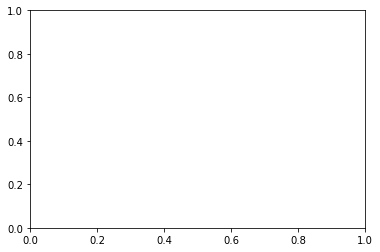

In [104]:
# Plot the data

### BEGIN SOLUTION

# plt.scatter(X, y)

### END SOLUTION

In [ ]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [105]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression()

In [106]:
y.shape

(7238, 1)

In [107]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[ 1.01805675e+08  1.01805682e+08  1.01805669e+08  1.01805680e+08
   1.01805673e+08  1.01805669e+08  1.01805672e+08  1.01805674e+08
   1.01805669e+08  1.01805672e+08  1.01805676e+08  1.01805675e+08
   8.48047612e+10  2.83858643e+11 -8.31504725e+10  1.18457988e+10
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

In [108]:
len(features_list)

116

In [109]:
features_list
user_input={'Apishapa': 1, 'Date': 600}
input_array=[]
for each_col in features_list: 
    if each_col in user_input: 
        input_array.append(user_input[each_col])
    else: 
        input_array.append(0)
input_array
model.predict([input_array])

array([[36.35650589]])

In [110]:
model.score(X, y)

0.0031215141788399903

In [42]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[101]]
Max X Value: [[1231]]


In [43]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

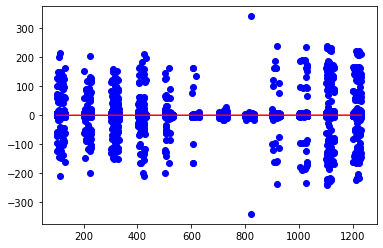

In [44]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION